# 本代码用于学习python的数据分析，数据挖掘基础知识，是对学习的一种记录，初次学习内容为实验楼免费课。

In [1]:
# -*- coding: utf-8 -*-

#数据分析基本库
import numpy as np
import pandas as pd 
import scipy
# 绘图库
import matplotlib.pylab as plt
import seaborn as sns
from jupyterthemes import jtplot
from ipywidgets import Image
from io import StringIO
import pydotplus
# warning库
import warnings

# jupyter内作图
%matplotlib inline 
sns.set()
jtplot.style(theme='onedork') # 选择一个绘图主题 
warnings.filterwarnings('ignore') # 忽略警告

#  一个好用的数据csv https://labfile.oss.aliyuncs.com/courses/906/los_census.csv"
# 人口普查数据 'https://labfile.oss.aliyuncs.com/courses/1283/adult.data.csv'
# 电信用户离网数据 'https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv'



# pandas去省略
'''
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
'''

# 尝试一：pandas数据探索

In [2]:
df1=pd.read_csv("https://labfile.oss.aliyuncs.com/courses/906/los_census.csv")
df1

Zip Code  Total Population  Median Age  Total Males  Total Females  \
0       91371                 1        73.5            0              1   
1       90001             57110        26.6        28468          28642   
2       90002             51223        25.5        24876          26347   
3       90003             66266        26.3        32631          33635   
4       90004             62180        34.8        31302          30878   
..        ...               ...         ...          ...            ...   
314     93552             38158        28.4        18711          19447   
315     93553              2138        43.3         1121           1017   
316     93560             18910        32.4         9491           9419   
317     93563               388        44.5          263            125   
318     93591              7285        30.9         3653           3632   

     Total Households  Average Household Size  
0                   1                    1.00  
1               12971                    4.40  
2               11731                    4.36  
3               15642                    4.22  
4               22547                    2.73  
..                ...                     ...  
314              9690                    3.93  
315               816                    2.62  
316              6469                    2.92  
317               103                    2.53  
318              1982                    3.67  

[319 rows x 7 columns]

In [3]:
df1.describe()

Zip Code  Total Population  Median Age   Total Males  \
count    319.000000        319.000000  319.000000    319.000000   
mean   91000.673981      33241.341693   36.527586  16391.564263   
std      908.360203      21644.417455    8.692999  10747.495566   
min    90001.000000          0.000000    0.000000      0.000000   
25%    90243.500000      19318.500000   32.400000   9763.500000   
50%    90807.000000      31481.000000   37.100000  15283.000000   
75%    91417.000000      44978.000000   41.000000  22219.500000   
max    93591.000000     105549.000000   74.000000  52794.000000   

       Total Females  Total Households  Average Household Size  
count     319.000000        319.000000              319.000000  
mean    16849.777429      10964.570533                2.828119  
std     10934.986468       6270.646400                0.835658  
min         0.000000          0.000000                0.000000  
25%      9633.500000       6765.500000                2.435000  
50%     16202.000000      10968.000000                2.830000  
75%     22690.500000      14889.500000                3.320000  
max     53185.000000      31087.000000                4.670000

In [4]:
# 透视表的制作

table=pd.pivot_table(df1,index=['Zip Code'])
table=table.T
table

Zip Code                  90001     90002     90003     90004    90005  \
Average Household Size      4.4      4.36      4.22      2.73      2.5   
Median Age                 26.6     25.50     26.30     34.80     33.9   
Total Females           28642.0  26347.00  33635.00  30878.00  18382.0   
Total Households        12971.0  11731.00  15642.00  22547.00  15044.0   
Total Males             28468.0  24876.00  32631.00  31302.00  19299.0   
Total Population        57110.0  51223.00  66266.00  62180.00  37681.0   

Zip Code                   90006    90007     90008    90010      90011  ...  \
Average Household Size      3.13      3.0      2.33     1.87       4.67  ...   
Median Age                 32.40     24.0     39.70    37.80      26.20  ...   
Total Females           28931.00  20005.0  17850.00  1926.00   51098.00  ...   
Total Households        18617.00  11944.0  13841.00  2014.00   22168.00  ...   
Total Males             30254.00  20915.0  14477.00  1874.00   52794.00  ...   
Total Population        59185.00  40920.0  32327.00  3800.00  103892.00  ...   

Zip Code                   93536     93543   93544     93550     93551  \
Average Household Size      3.07      3.66     2.2      3.58      3.18   
Median Age                 34.40     32.90    52.4     27.50     37.00   
Total Females           33114.00   6338.00   570.0  38515.00  25742.00   
Total Households        20964.00   3560.00   569.0  20864.00  15963.00   
Total Males             37804.00   6695.00   689.0  36414.00  25056.00   
Total Population        70918.00  13033.00  1259.0  74929.00  50798.00   

Zip Code                   93552    93553     93560   93563    93591  
Average Household Size      3.93     2.62      2.92    2.53     3.67  
Median Age                 28.40    43.30     32.40   44.50    30.90  
Total Females           19447.00  1017.00   9419.00  125.00  3632.00  
Total Households         9690.00   816.00   6469.00  103.00  1982.00  
Total Males             18711.00  1121.00   9491.00  263.00  3653.00  
Total Population        38158.00  2138.00  18910.00  388.00  7285.00  

[6 rows x 319 columns]

<BarContainer object of 319 artists>

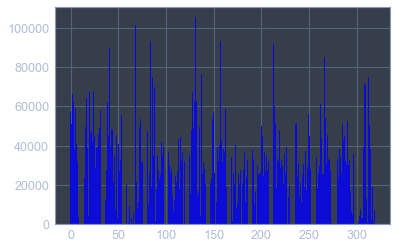

In [5]:
# 可视化尝试
plt.bar(np.arange(319),table.iloc[2])
plt.bar(np.arange(319),table.iloc[5],color='Blue')

# 数据预览及预处理

In [6]:
df2 = pd.read_csv("https://labfile.oss.aliyuncs.com/courses/1283/adult.data.csv")
df2.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# 问题：数据集中有多少男性和女性？
df2['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [9]:
# 问题：数据集中女性的平均年龄是多少？
df2[df2['sex']=='Female']['age'].mean()

36.85823043357163

In [10]:
# 问题:数据集中德国公民的比例是多少？
print(float((df2['native-country'] == 'Germany').sum()) / df2.shape[0])
df2['native-country'].value_counts(normalize=True)

0.004207487485028101


United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

In [11]:
# 使用 groupby 和 describe 统计不同种族和性别人群的年龄分布数据
df2.groupby(by=['sex','race'])['age'].describe()

count       mean        std   min   25%   50%  \
sex    race                                                                  
Female Amer-Indian-Eskimo    119.0  37.117647  13.114991  17.0  27.0  36.0   
       Asian-Pac-Islander    346.0  35.089595  12.300845  17.0  25.0  33.0   
       Black                1555.0  37.854019  12.637197  17.0  28.0  37.0   
       Other                 109.0  31.678899  11.631599  17.0  23.0  29.0   
       White                8642.0  36.811618  14.329093  17.0  25.0  35.0   
Male   Amer-Indian-Eskimo    192.0  37.208333  12.049563  17.0  28.0  35.0   
       Asian-Pac-Islander    693.0  39.073593  12.883944  18.0  29.0  37.0   
       Black                1569.0  37.682600  12.882612  17.0  27.0  36.0   
       Other                 162.0  34.654321  11.355531  17.0  26.0  32.0   
       White               19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
sex    race                             
Female Amer-Indian-Eskimo  46.00  80.0  
       Asian-Pac-Islander  43.75  75.0  
       Black               46.00  90.0  
       Other               39.00  74.0  
       White               46.00  90.0  
Male   Amer-Indian-Eskimo  45.00  82.0  
       Asian-Pac-Islander  46.00  90.0  
       Black               46.00  90.0  
       Other               42.00  77.0  
       White               49.00  90.0

In [12]:
# 问题：计算各国超过和低于 50K 人群各自的平均周工作时长。
df2.groupby(by=['salary','native-country'])['hours-per-week'].mean()


salary  native-country 
<=50K   ?                  40.164760
        Cambodia           41.416667
        Canada             37.914634
        China              37.381818
        Columbia           38.684211
                             ...    
>50K    Thailand           58.333333
        Trinadad&Tobago    40.000000
        United-States      45.505369
        Vietnam            39.200000
        Yugoslavia         49.500000
Name: hours-per-week, Length: 82, dtype: float64

# 尝试二：学习数据可视化

In [13]:
df3 = pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')
df3

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6            

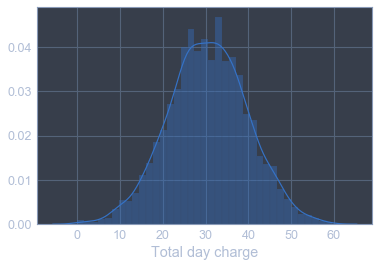

In [14]:
sns.distplot(df3['Total day charge']) # 同时显示直方图和密度分布图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001772A047B88>,
      dtype=object)

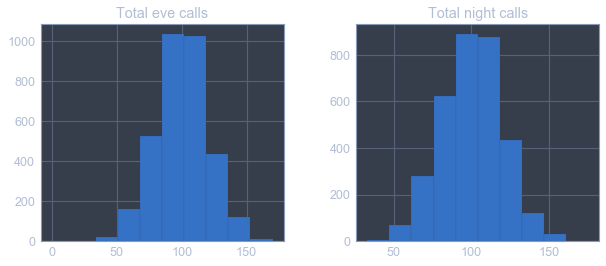

In [15]:
feature = ['Total eve calls','Total night calls']
df3[feature].hist(figsize=(10,4)) # 直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001772A0CF3C8>,
      dtype=object)

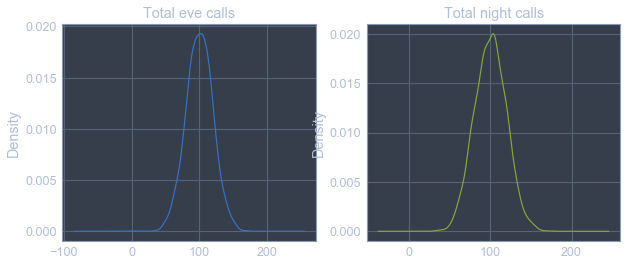

In [16]:
df3[feature].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4), legend=False, title=feature) # 密度分布图

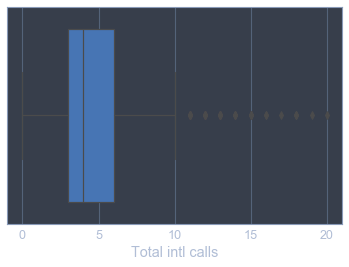

In [17]:
 # 箱型图 ,疑惑？？？箱形图显示了单独样本的特定统计数据
sns.boxplot(x='Total intl calls', data=df3) 

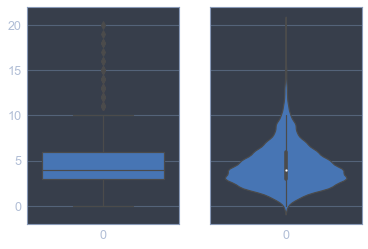

In [18]:
# 提琴型图？
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df3['Total intl calls'], ax=axes[0])
sns.violinplot(data=df3['Total intl calls'], ax=axes[1]) 

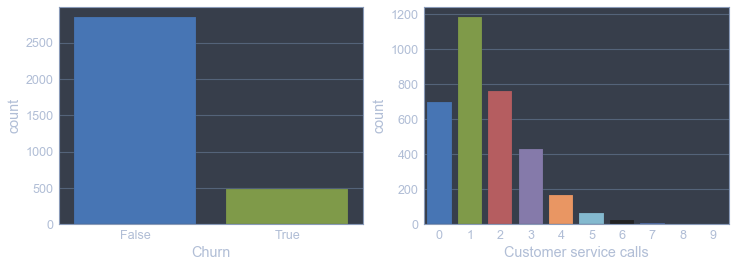

In [19]:
# 两个分类变量的分布
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df3, ax=axes[0])
sns.countplot(x='Customer service calls', data=df3, ax=axes[1])

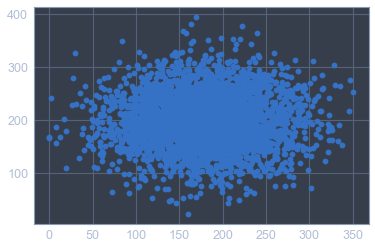

In [20]:
# 多变量可视化 不理解 ！！！T-T 流泪
plt.scatter(df3['Total day minutes'], df3['Total night minutes'])

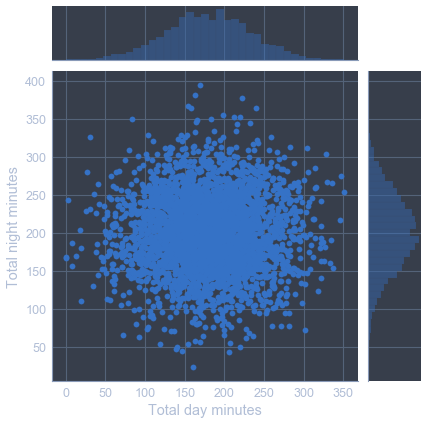

In [21]:
sns.jointplot(x='Total day minutes', y='Total night minutes',data=df3, kind='scatter')

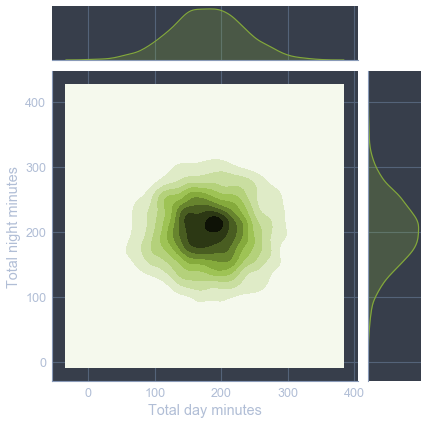

In [22]:
sns.jointplot('Total day minutes','Total night minutes',data=df3,kind='kde',color='g') 

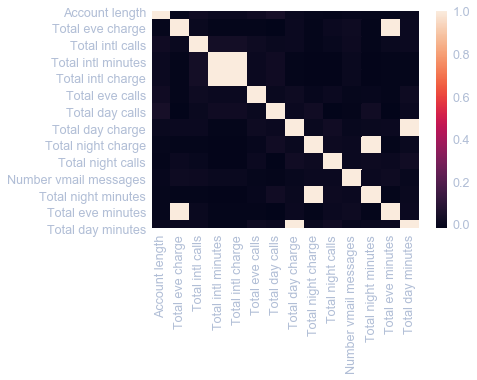

In [23]:
numerical = list(set(df3.columns) -
                 set(['State', 'International plan', 'Voice mail plan',
                      'Area code', 'Churn', 'Customer service calls']))
# 计算和绘图
corr_matrix = df3[numerical].corr()
sns.heatmap(corr_matrix)

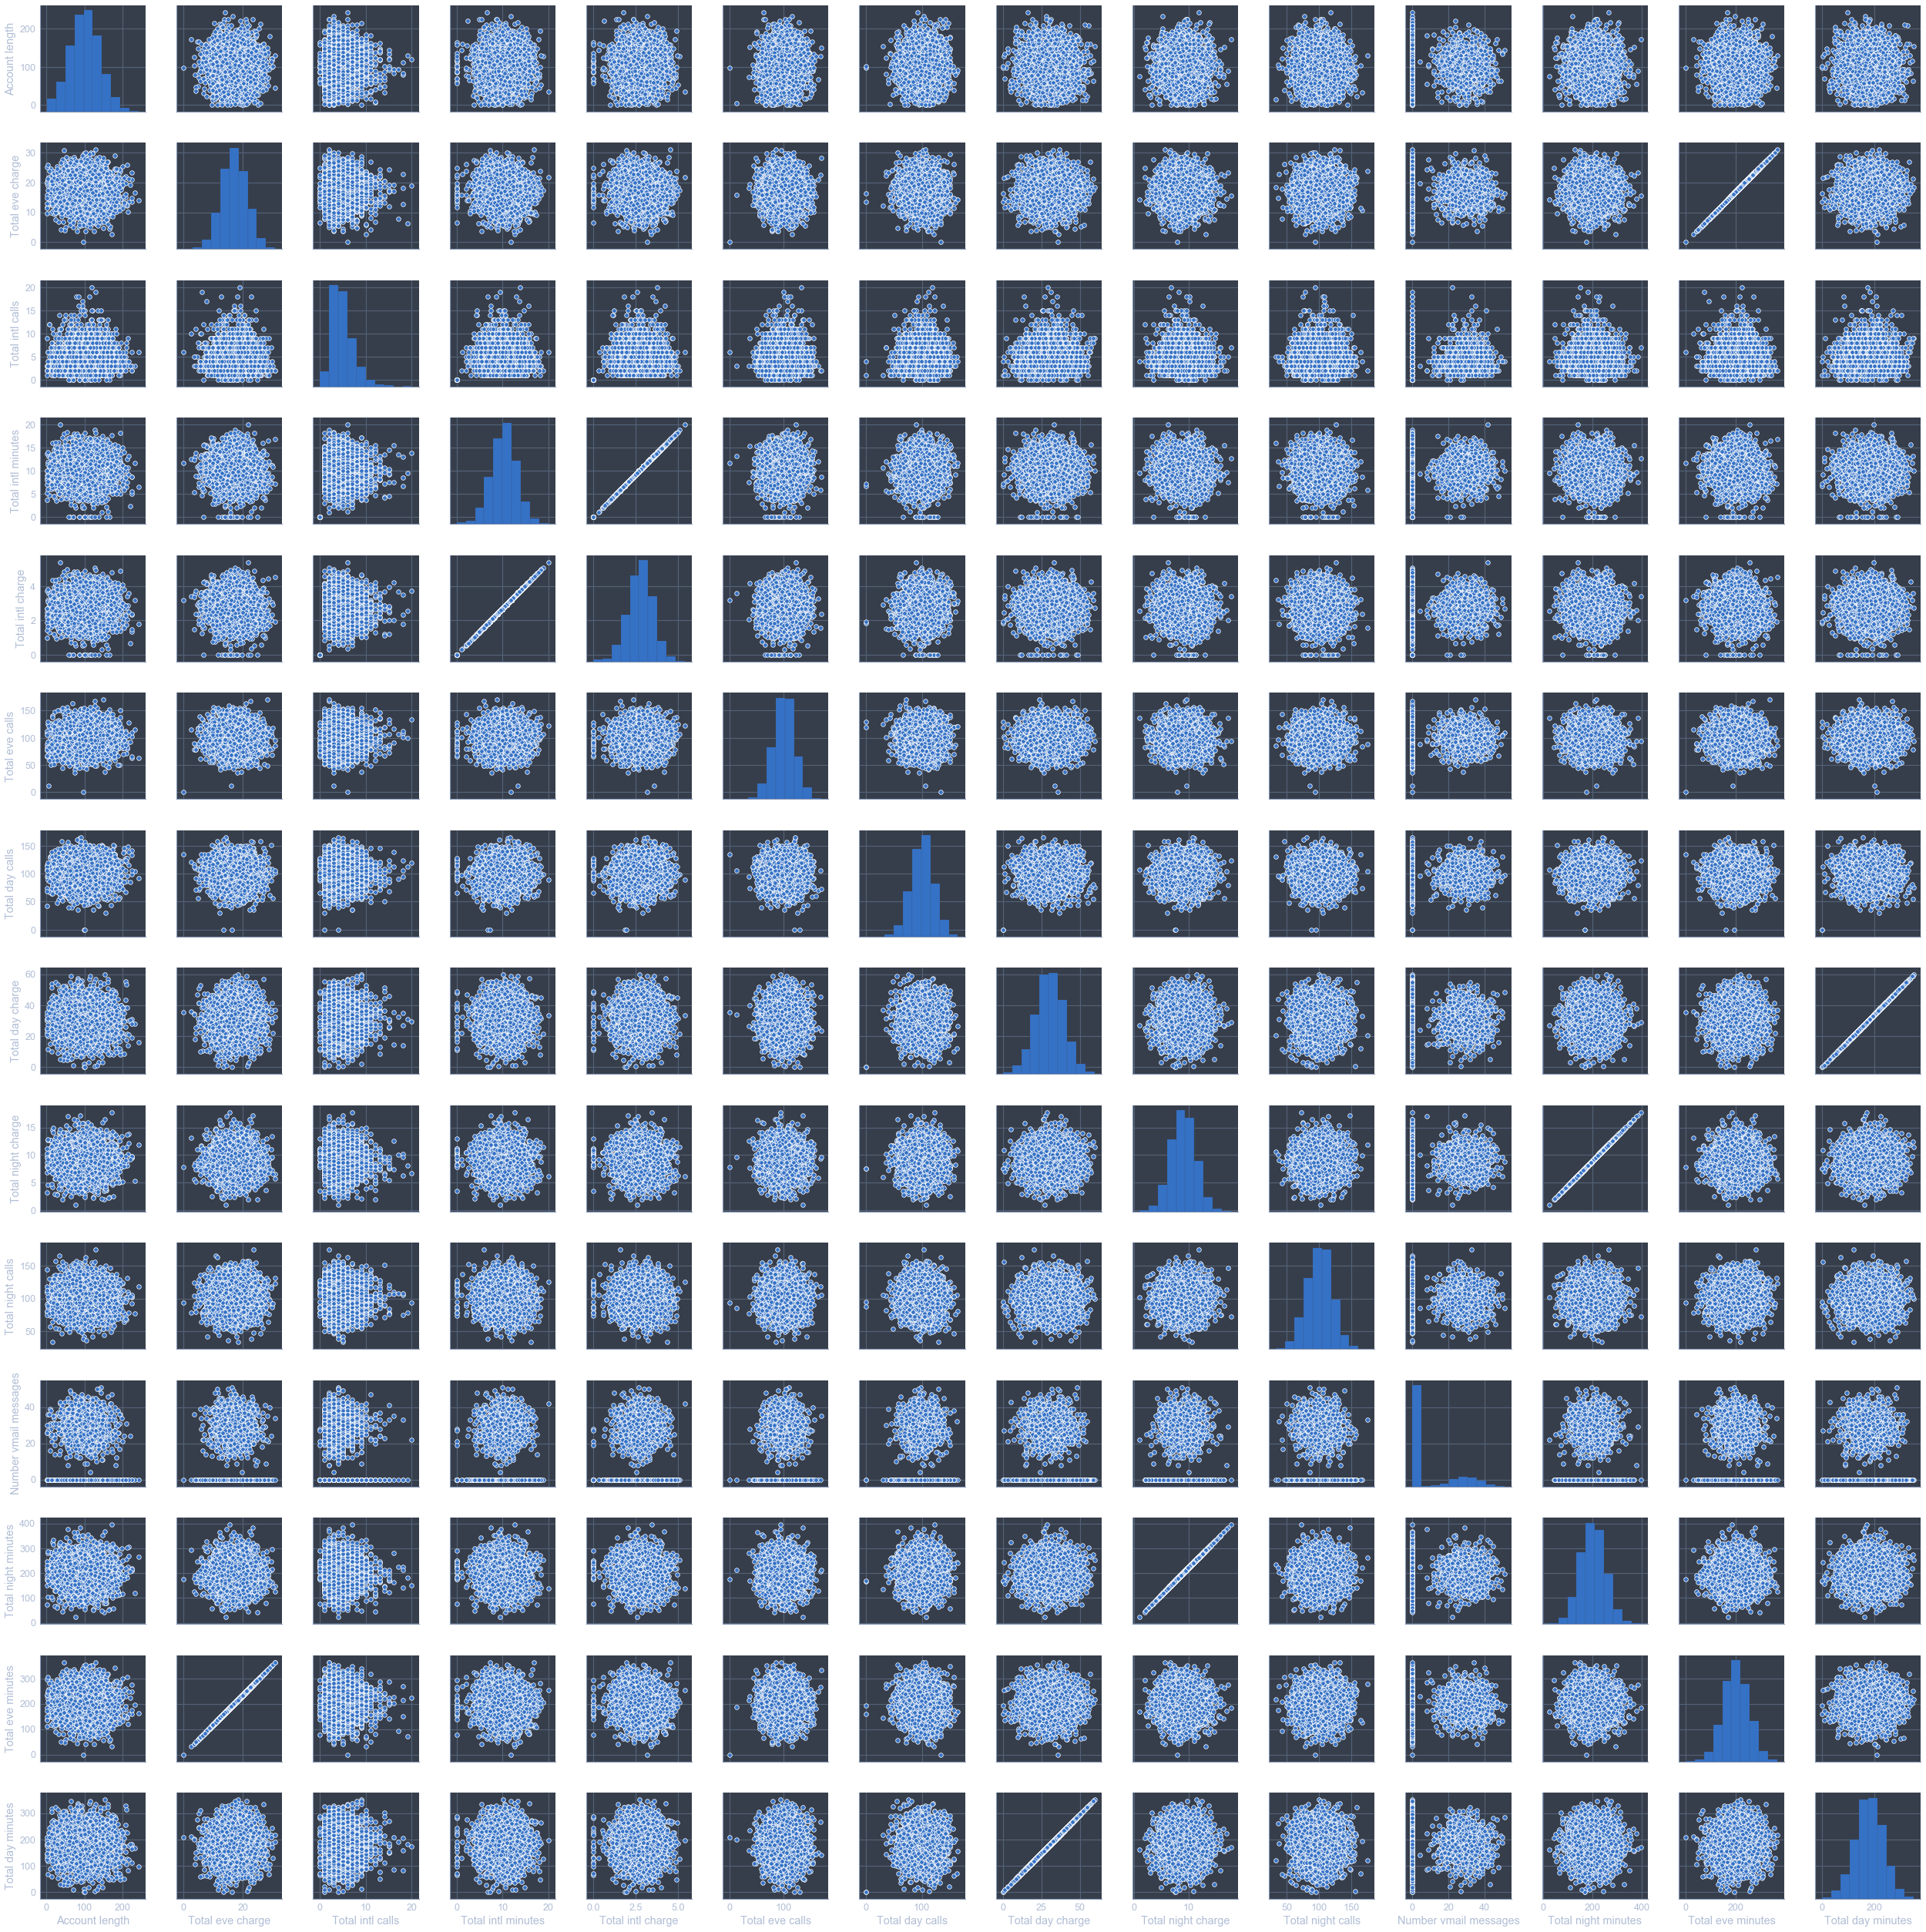

In [24]:
rical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 
                                       'Total night charge', 'Total intl charge']))
%config InlineBackend.figure_format = 'png'
sns.pairplot(df3[numerical])

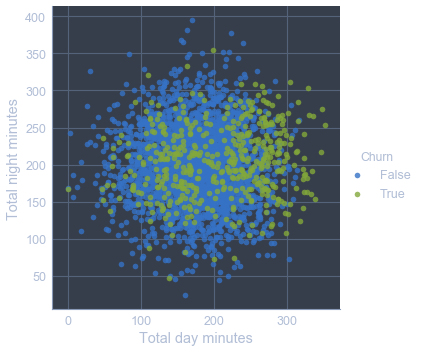

In [25]:
sns.lmplot('Total day minutes', 'Total night minutes',data=df3, hue='Churn', fit_reg=False)

# 机器学习

In [26]:
data=pd.read_csv('https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')

In [27]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [28]:
import pydotplus
from sklearn.tree import export_graphviz

In [29]:
data['International plan'] = pd.factorize(data['International plan'])[0]
data['Voice mail plan'] = pd.factorize(data['Voice mail plan'])[0]
data['Churn'] = data['Churn'].astype('int')
states = data['State']
y = data['Churn']
data.drop(['State', 'Churn'], axis=1, inplace=True)

In [30]:
data.describe()

Account length    Area code  International plan  Voice mail plan  \
count     3333.000000  3333.000000         3333.000000      3333.000000   
mean       101.064806   437.182418            0.096910         0.723372   
std         39.822106    42.371290            0.295879         0.447398   
min          1.000000   408.000000            0.000000         0.000000   
25%         74.000000   408.000000            0.000000         0.000000   
50%        101.000000   415.000000            0.000000         1.000000   
75%        127.000000   510.000000            0.000000         1.000000   
max        243.000000   510.000000            1.000000         1.000000   

       Number vmail messages  Total day minutes  Total day calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000          0.000000   
25%           24.430000         166.600000        87.000000         14.160000   
50%           30.500000         201.400000       100.000000         17.120000   
75%           36.790000         235.300000       114.000000         20.000000   
max           59.640000         363.700000       170.000000         30.910000   

       Total night minutes  Total night calls  Total night charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       Total intl minutes  Total intl calls  Total intl charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       Customer service calls  
count             3333.000000  
mean                 1.562856  
std                  1.315491  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  9.000000

In [31]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3, random_state=25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [32]:
from sklearn.metrics import accuracy_score

knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.888

In [2]:
import pandas_datareader.data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

# 载入数据
start=datetime.datetime(2006, 10, 1)
end=datetime.datetime(2012, 1, 1)
pdr.get_data_yahoo('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2006-10-02  10.728572  10.838572  10.614285  10.694285   9.305108  178159800
2006-10-03  10.635715  10.707143  10.455714  10.582857   9.208156  197677200
2006-10-04  10.585714  10.780000  10.451428  10.768572   9.369746  207270700
2006-10-05  10.647142  10.880000  10.590000  10.690000   9.301377  170970800
2006-10-06  10.631429  10.720000  10.544286  10.602858   9.225556  116739700
...               ...        ...        ...        ...        ...        ...
2011-12-23  57.098572  57.655716  57.070000  57.618572  50.133961   67349800
2011-12-27  57.585712  58.441429  57.574287  58.075714  50.531731   66269000
2011-12-28  58.127144  58.321430  57.334286  57.520000  50.048210   57165500
2011-12-29  57.628571  57.950001  57.215714  57.874287  50.356480   53994500
2011-12-30  57.644287  58.040001  57.641430  57.857143  50.341557   44915500

[1323 rows x 6 columns]

In [ ]:
! 